/var/folders/yn/xvrs9tl16fv_l52c1z41xdd00000gn/T/ipykernel_73684/852658217.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
/var/folders/yn/xvrs9tl16fv_l52c1z41xdd00000gn/T/ipykernel_73684/852658217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Hour'] = df_cleaned['Date'].dt.hour
/var/folders/yn/xvrs9tl16fv_l52c1z41xdd00000gn/T/ipykernel_73684/852658217.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

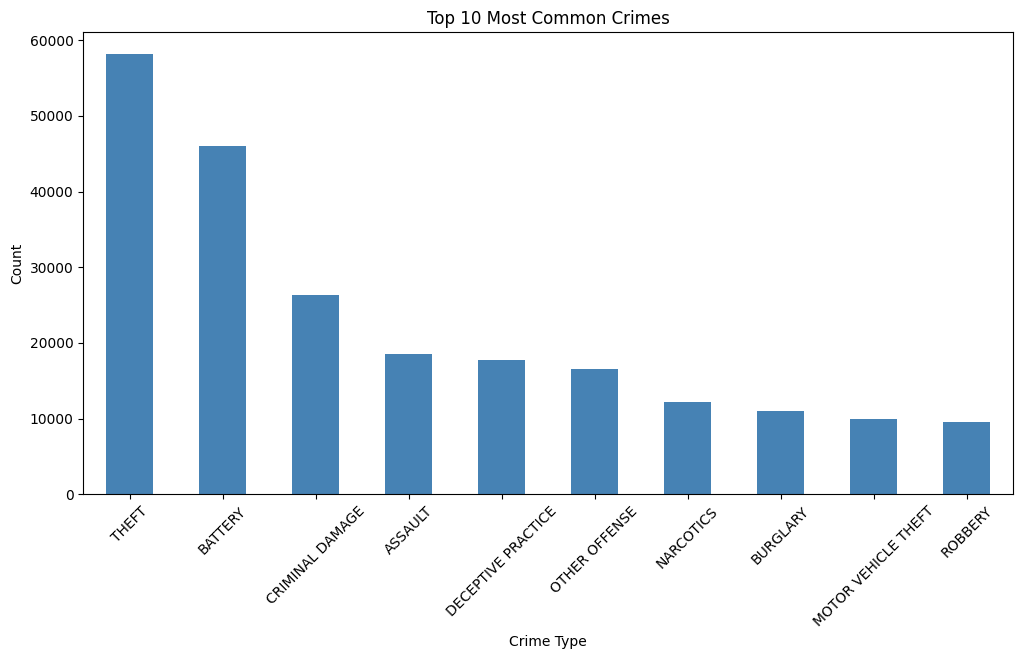

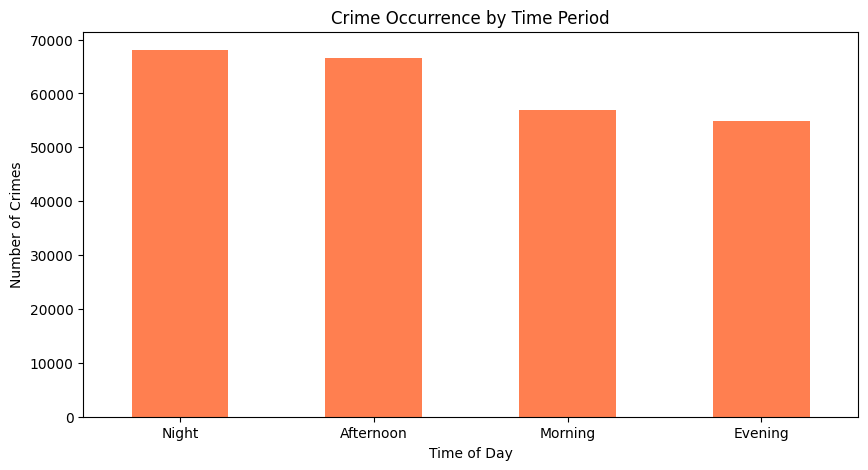

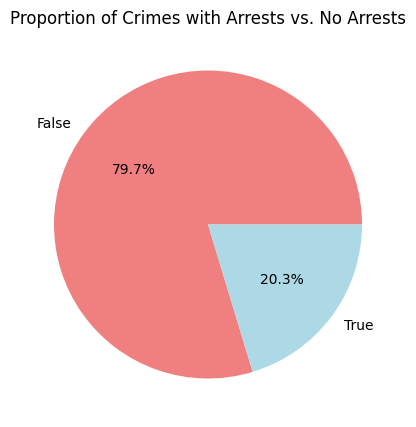

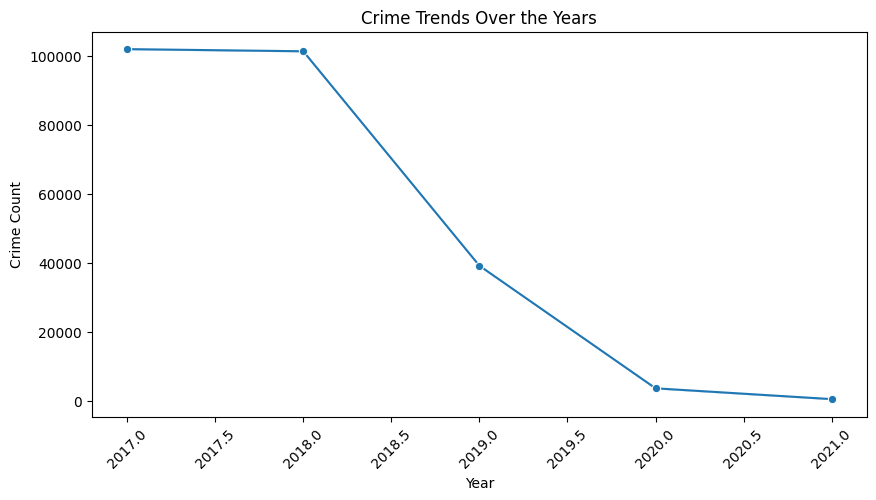

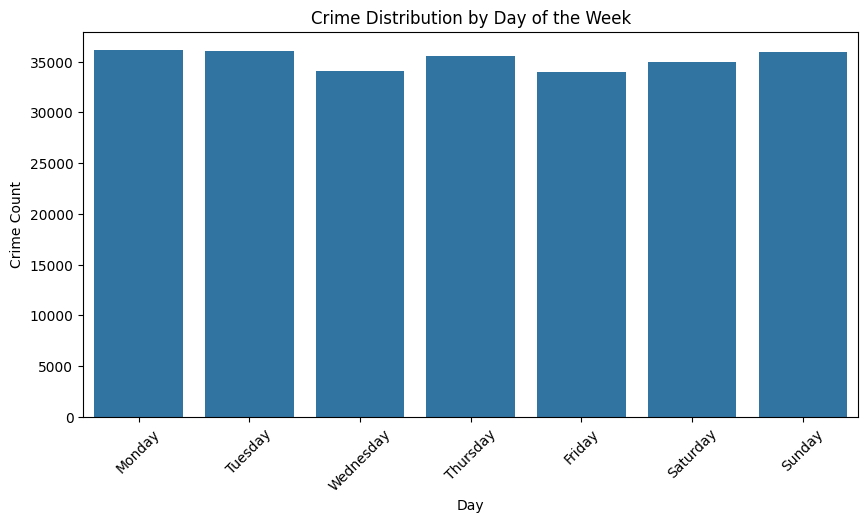

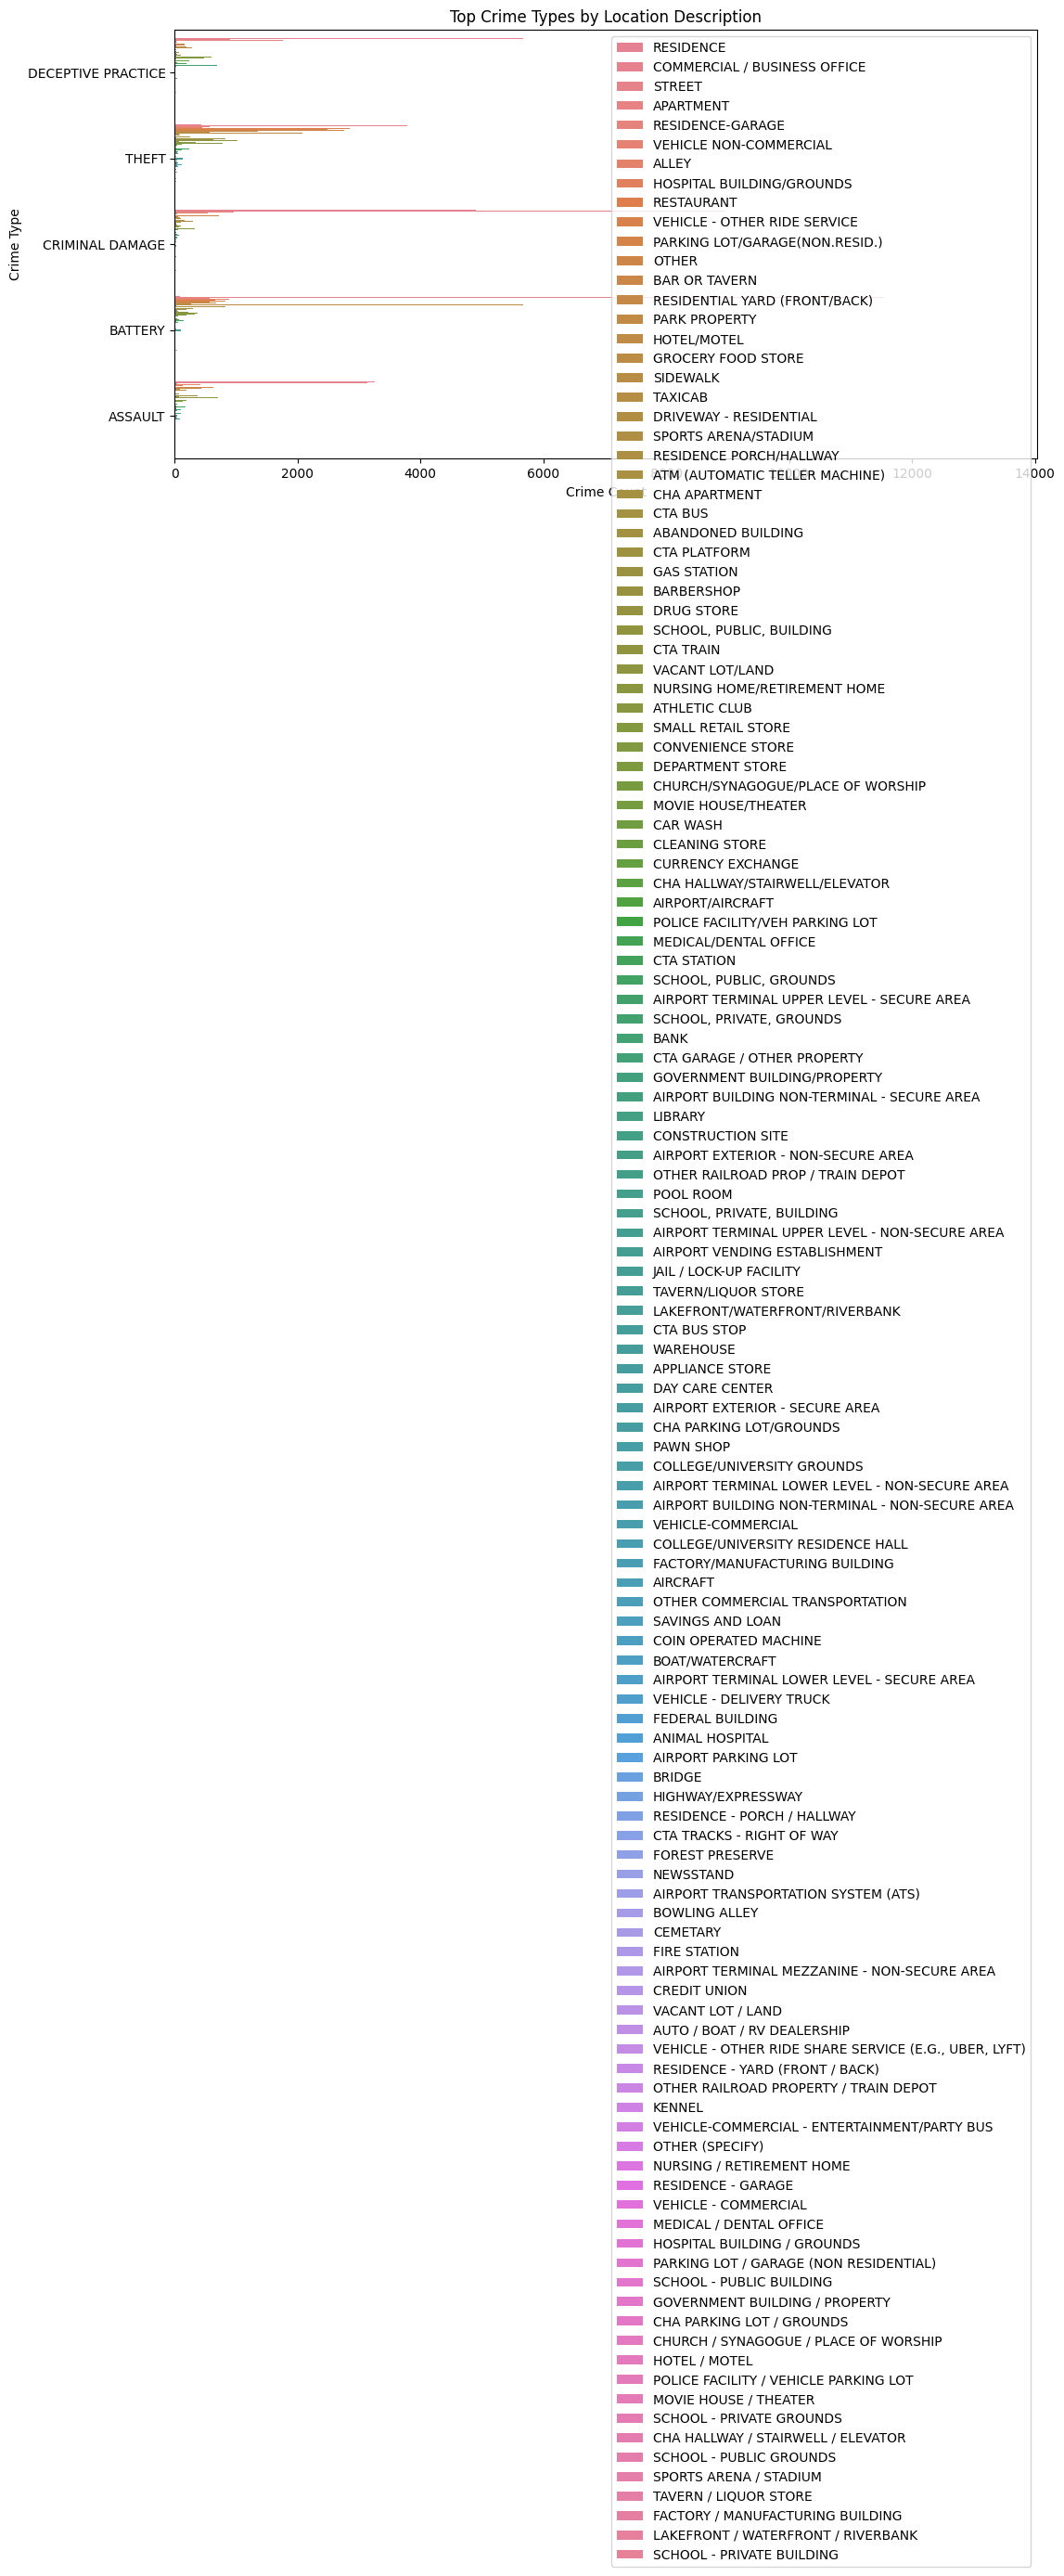

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "Crime_data.xlsx"  # Update with actual path
df = pd.read_excel(file_path)

# Drop rows with missing Latitude/Longitude (essential for mapping)
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Extract time-related features
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Hour'] = df_cleaned['Date'].dt.hour
df_cleaned['Day of Week'] = df_cleaned['Date'].dt.day_name()
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()

# Categorize time into Morning, Afternoon, Evening, and Night
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['Time Period'] = df_cleaned['Hour'].apply(time_of_day)

# 1. Plot the Top 10 Most Common Crimes
plt.figure(figsize=(12, 6))
df_cleaned['Primary Type'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 Most Common Crimes")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Display crime trends by Time Period
plt.figure(figsize=(10, 5))
df_cleaned['Time Period'].value_counts().plot(kind='bar', color='coral')
plt.title("Crime Occurrence by Time Period")
plt.xlabel("Time of Day")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.show()# 2. Generate a crime density map
map_center = [df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(crime_map)

# Add points to the map
for _, row in df_cleaned.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Crime: {row['Primary Type']}<br>Location: {row['Block']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

# Save the interactive crime map
crime_map.save("Crime_Map.html")

# 3. Arrest vs. No Arrest Cases
plt.figure(figsize=(8, 5))
df_cleaned['Arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title("Proportion of Crimes with Arrests vs. No Arrests")
plt.ylabel("")
plt.show()

# 4. Crime Trends Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="Year", y=df_cleaned.groupby("Year")["ID"].transform("count"), marker="o")
plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.show()

# 5. Crime Distribution by Day of the Week
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x="Day of Week", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Crime Distribution by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.show()

# 6. Crime Type vs. Location
plt.figure(figsize=(12, 6))
top_crimes = df_cleaned['Primary Type'].value_counts().index[:5]  # Top 5 crimes
df_top_crimes = df_cleaned[df_cleaned['Primary Type'].isin(top_crimes)]
sns.countplot(data=df_top_crimes, y="Primary Type", hue="Location Description")
plt.title("Top Crime Types by Location Description")
plt.xlabel("Crime Count")
plt.ylabel("Crime Type")
plt.legend(loc='upper right')
plt.show()